<a href="https://colab.research.google.com/github/GREGOIRE5/MY-PROFILE/blob/main/KNN_Gr%C3%A9goire_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# import "spine.csv"
files.upload()

Saving spine.csv to spine (1).csv


{'spine (1).csv': b'pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att\r\n63.0278175,22.55258597,39.60911701,40.47523153,98.67291675,-0.254399986,0.744503464,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal\r\n39.05695098,10.06099147,25.01537822,28.99595951,114.4054254,4.564258645,0.415185678,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal\r\n68.83202098,22.21848205,50.09219357,46.61353893,105.9851355,-3.530317314,0.474889164,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal\r\n69.29700807,24.65287791,44.31123813,44.64413017,101.8684951,11.21152344,0.369345264,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal\r\n49.71285934,9.652074879,28.317406,40.06078446,108.1687249,7.918500615,0.543360472,35.494,15.9546,8.87237,-16.378376,24.9171,Abnormal\r\n40.25019968,13.92190658,25.1249496,26.32829311,130.3278713,2.230651729,0.789992856,2

In [ ]:
# read data
df = pd.read_csv('spine.csv')

In [ ]:
# show data
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [ ]:
# detect missing values
df.isnull().sum().sum()

0

In [ ]:
# transform the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [ ]:
# split the data
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Class_att', axis = 1)
y = df['Class_att']

In [ ]:
y.replace(('Abnormal','Normal'),(0,1), inplace = True)

In [ ]:
y.value_counts()

0    210
1    100
Name: Class_att, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=2)

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler ()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
# standardization of x_train
stand_x_train = scaler.transform(x_train)

In [ ]:
df_stand_x_train = pd.DataFrame(stand_x_train,columns=x_train.columns)

In [ ]:
df_stand_x_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,-0.396917,-0.399323,-0.577578,-0.226688,-0.329924,-0.570916,0.797514,0.371502,-0.452132,-0.425176,-1.362392,1.520287
1,-0.530421,-0.869723,0.289123,-0.069384,0.607093,-0.692257,-0.019592,0.129209,-0.746617,-0.656603,1.562776,1.030411
2,-0.241343,0.217809,-0.465497,-0.457928,1.555964,-0.685188,-1.378894,-1.208452,0.950330,1.013342,0.083050,1.392827
3,1.472984,1.605260,-0.228437,0.755541,1.248987,1.889737,-0.046525,0.408864,-1.271691,-1.074914,-0.613782,-1.262586
4,0.056324,-0.021964,-0.278719,0.086810,0.192844,-0.562198,-0.062596,-1.491713,0.596095,-1.304690,1.061837,-0.102982


In [ ]:
# standardization of x_test
stand_x_test = scaler.transform(x_test)

In [ ]:
df_stand_x_test = pd.DataFrame(stand_x_test,columns=x_test.columns)

In [ ]:
df_stand_x_test.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,-0.228888,-0.398173,-0.454710,-0.014048,-1.838686,-0.114218,0.180053,-1.592932,1.554020,1.049569,-0.218782,0.694743
1,-0.987510,-0.756419,-1.288569,-0.728742,0.382895,-0.595676,-0.601904,-1.031222,1.432807,-1.478036,-1.720547,0.150003
2,-0.865083,-0.676266,-1.282936,-0.628927,-0.079499,-0.904355,-1.186955,0.844170,-1.571464,-1.536594,-0.918857,0.030935
3,0.877699,2.579509,0.300367,-0.677647,0.442555,0.607191,0.383001,1.353134,-1.386595,0.604776,-1.481538,-0.703601
4,-0.846223,-0.686119,-0.521719,-0.598123,0.883609,-0.723204,1.799174,0.588552,1.613349,1.542004,0.020111,0.790647


In [ ]:
# K-NN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(df_stand_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(df_stand_x_test)

In [ ]:
error_rate = []

In [ ]:
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(df_stand_x_test)
    error_rate.append(np.mean(y_pred != y_test))

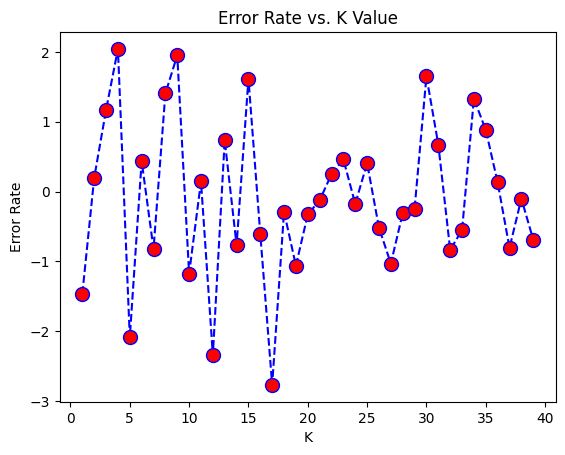

In [ ]:
# Create the x and y arrays
x = range(1,40)
y = np.random.randn(117)

# Truncate the y array to have the same length as the x array
y = y[:len(x)]

plt.plot(x, y, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.show()

In [ ]:
# performance mesure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
y_pred = knn.predict(df_stand_x_test)

print('WITH K=1')
print('\n')

print(confusion_matrix(y_test,y_pred))
print('\n')

print(classification_report(y_test,y_pred))

WITH K=1


[[68  0]
 [25  0]]


              precision    recall  f1-score   support

           0       0.73      1.00      0.84        68
           1       0.00      0.00      0.00        25

    accuracy                           0.73        93
   macro avg       0.37      0.50      0.42        93
weighted avg       0.53      0.73      0.62        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
